# Plotting with Pandas and Matplotlib

This is a brief supplement to demonstrate the replication of the plots from Lesson 6 using matplotlib together with Pandas.  

**GOALS**: 

- Use matplotlib to customize plots

- Plot data from Pandas DataFrame

- Use Seaborn to include additional Features in Visualizations


## Matplotlib in the Notebook

We can use the Jupyter notebooks to investigate the plots interactively by using the `%matplotlib notebook` command.  By doing so, we create a figure object embedded in the notebook that also allows saving, paning, and zooming.  Further, we can continue to interact with a single plot across many cells unlike the more traditional `%matplotlib inline` magic command.

First, we import the plotting library `pyplot` and abbreviate it as `plt`.  We also set the style to be `seaborn-white`, a clean simple background.  We also import the Pandas and Numpy libraries per usual.  

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np
import pandas as pd

### A Simple ScatterPlot

To create a scatterplot, we can generate some random numbers using the `np.random.randn()` function to represent the *x, y, color,* and *size* of the points for the plot.  Next, we create a figure and assign an optional `figsize` argument.  Finally, we apply the `BuPu` colormap available from matplotlib's built-in colormaps.

Somewhat like `ggplot2`, we can continue to add elements with additional lines.  For example, we add a main title and $x$ and $y$ axis labels.

<IPython.core.display.Javascript object>


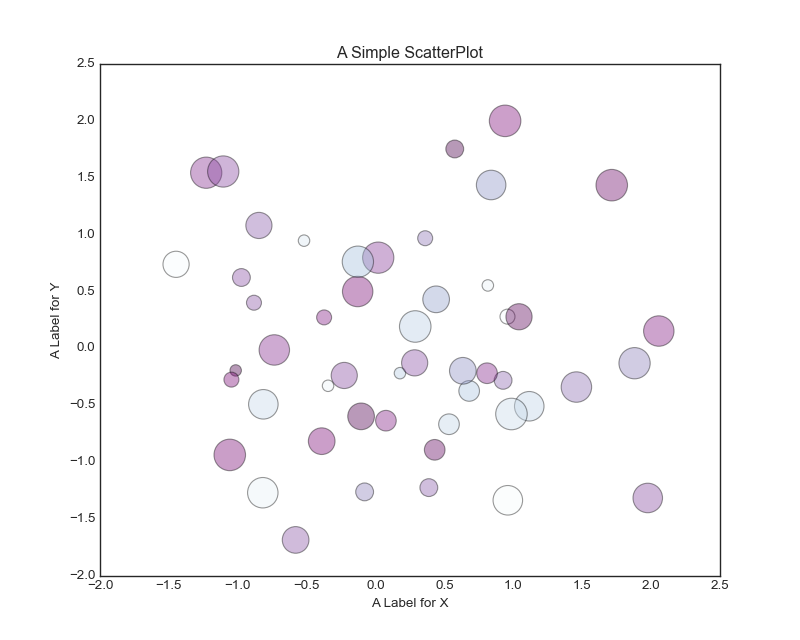

In [2]:
x = np.random.randn(50)
y = np.random.randn(50)
colors = np.random.rand(50)
sizes = 1000 * np.random.rand(10)

plt.figure(figsize = (10, 8))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.4,cmap='BuPu')
plt.title("A Simple ScatterPlot")
plt.xlabel("A Label for X")
plt.ylabel("A Label for Y")

## Pandas and Matplotlib

We can load the `surveys_complete.csv` dataset into the notebook as a DataFrame named df. Now, we can call plot functions on the DataFrame itself or with a conventional matplotlib approach.

Similar to the first example, we can directly name the $x$ and $y$ values by reference to the DataFrame's column names.  By taking a quick peek at the head of the dataframe we can see the names of the columns that we are interested in plotting and call them accordingly.

In [3]:
df = pd.read_csv( 'data_for_plots/surveys_complete.csv', index_col=0)

In [4]:
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type
1,845,5,6,1978,2,NL,M,32,204,Neotoma,albigula,Rodent,Control
2,1164,8,5,1978,2,NL,M,34,199,Neotoma,albigula,Rodent,Control
3,1261,9,4,1978,2,NL,M,32,197,Neotoma,albigula,Rodent,Control
4,1756,4,29,1979,2,NL,M,33,166,Neotoma,albigula,Rodent,Control
5,1818,5,30,1979,2,NL,M,32,184,Neotoma,albigula,Rodent,Control


<IPython.core.display.Javascript object>


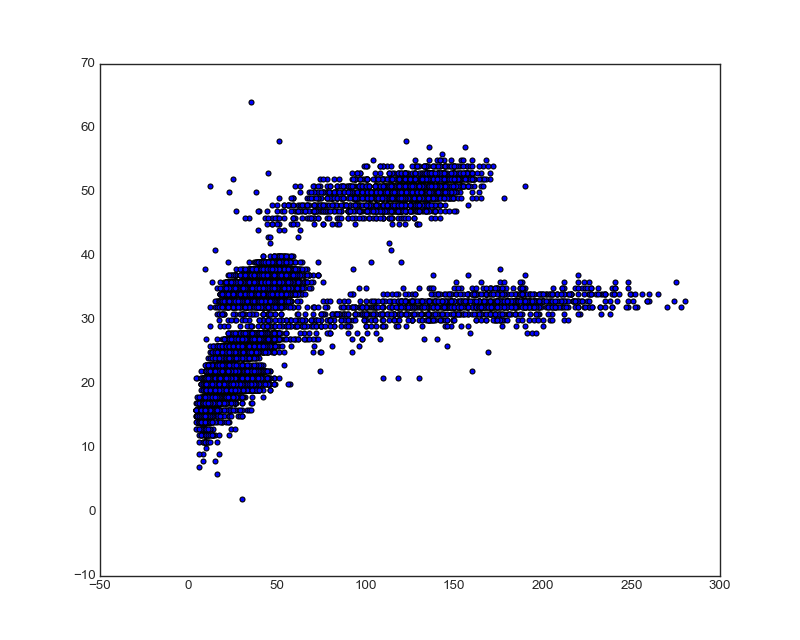

In [5]:
plt.figure(figsize = (10, 8))
plt.scatter(df['weight'], df['hindfoot_length'])

<IPython.core.display.Javascript object>


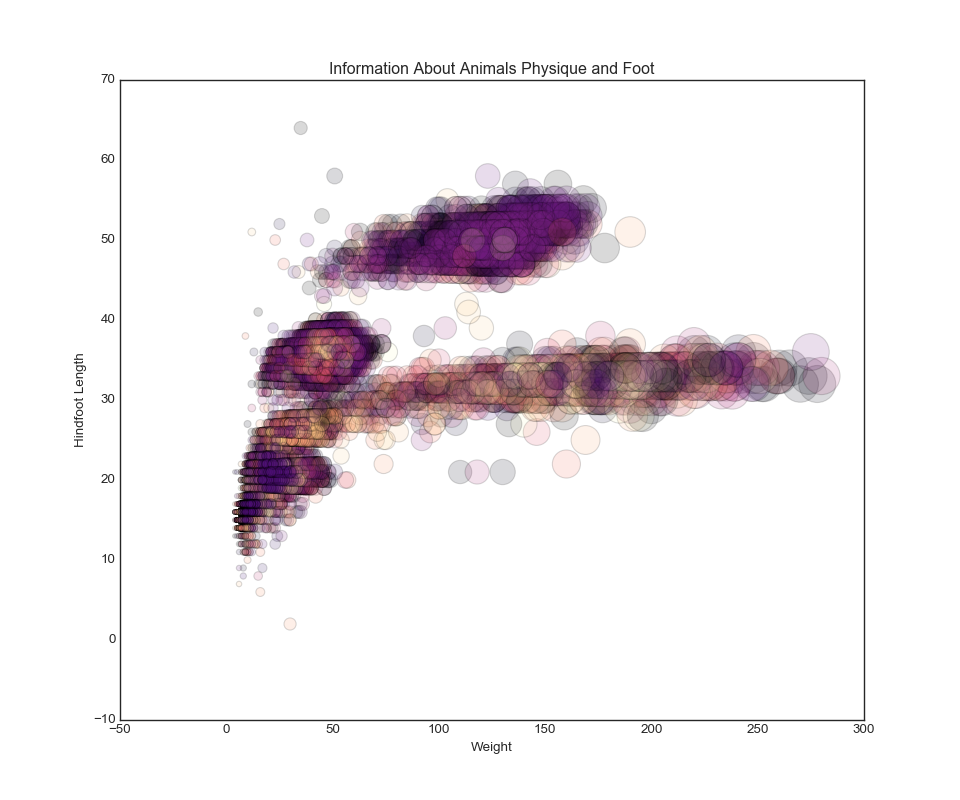

In [6]:
plt.figure(figsize = (12,10))
plt.scatter(df['weight'], df['hindfoot_length'], s = df['weight']*4, alpha = 0.15, c = df['plot_id'], cmap = 'magma')
plt.title("Information About Animals Physique and Foot")
plt.xlabel("Weight")
plt.ylabel("Hindfoot Length")

## Plotting From the DataFrame

We can also plot directly from the DataFrame.  Now, the `figsize` argument is a keyword in the scatter function itself.  This demonstrates the range of direct plotting methods available.  For more help with the DataFrame plotting use the built-in help with `df.plot?`.  

Below, you see a scatterplot and a boxplot produced from the DataFrame with a single call.

<IPython.core.display.Javascript object>


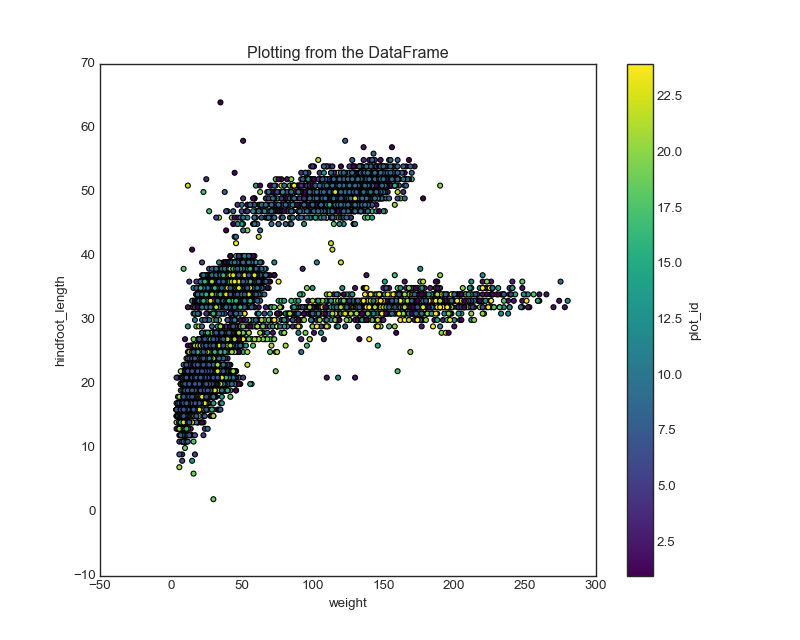

In [8]:
df.plot.scatter('weight', 'hindfoot_length', c = 'plot_id', cmap = 'viridis', figsize = (10, 8),
                title= "Plotting from the DataFrame")


<IPython.core.display.Javascript object>


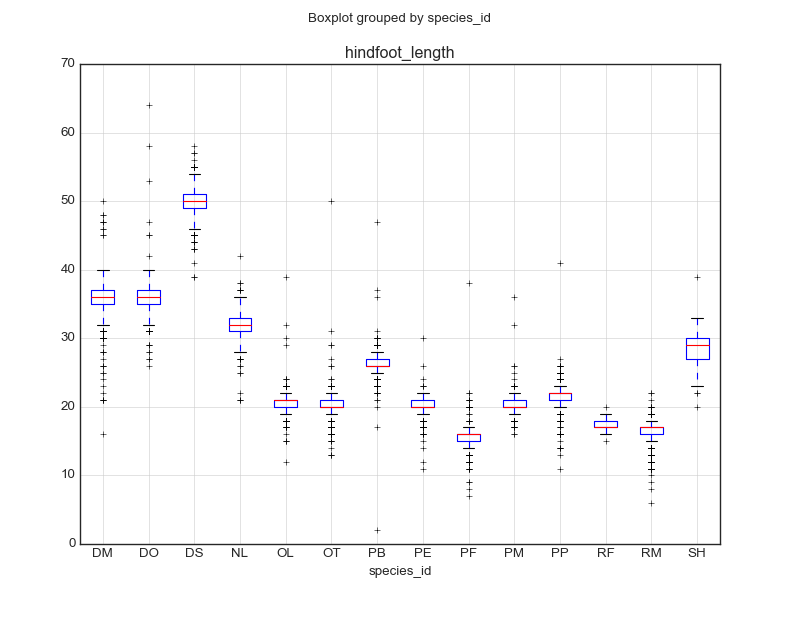

In [9]:
df.boxplot('hindfoot_length', by = 'species_id', figsize = (10, 8))

## Seaborn

The Seaborn Library provides additional plotting functionality for data visualization in Python.  Here, we show how Seaborn produces a typical regression plot, a boxplot factored by sex, and a jointplot with histograms on the axes.  Finally, we add some additional layers to the boxplot by using a violinplot that is split by the `sex` variable.

In [15]:
import seaborn as sns
sns.set_style("whitegrid")

<IPython.core.display.Javascript object>


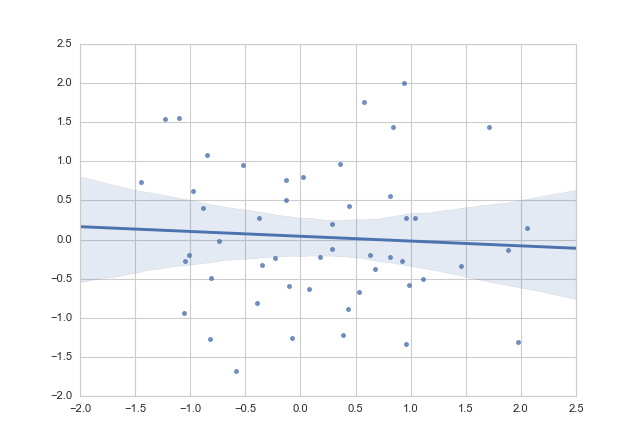

In [16]:
plt.figure()
sns.regplot(x, y)

<IPython.core.display.Javascript object>


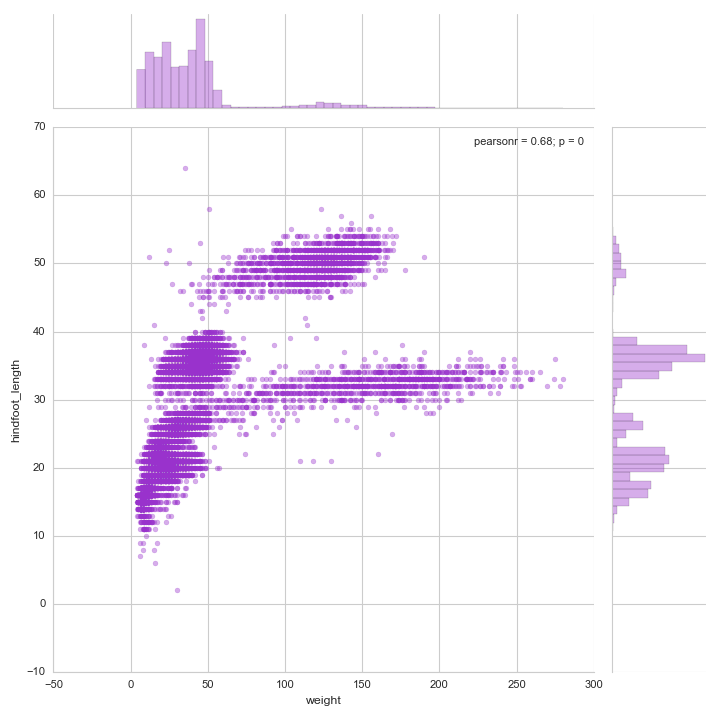

In [21]:
sns.jointplot('weight', 'hindfoot_length', data = df, size = 9, color = 'darkorchid', alpha = 0.4)

<IPython.core.display.Javascript object>


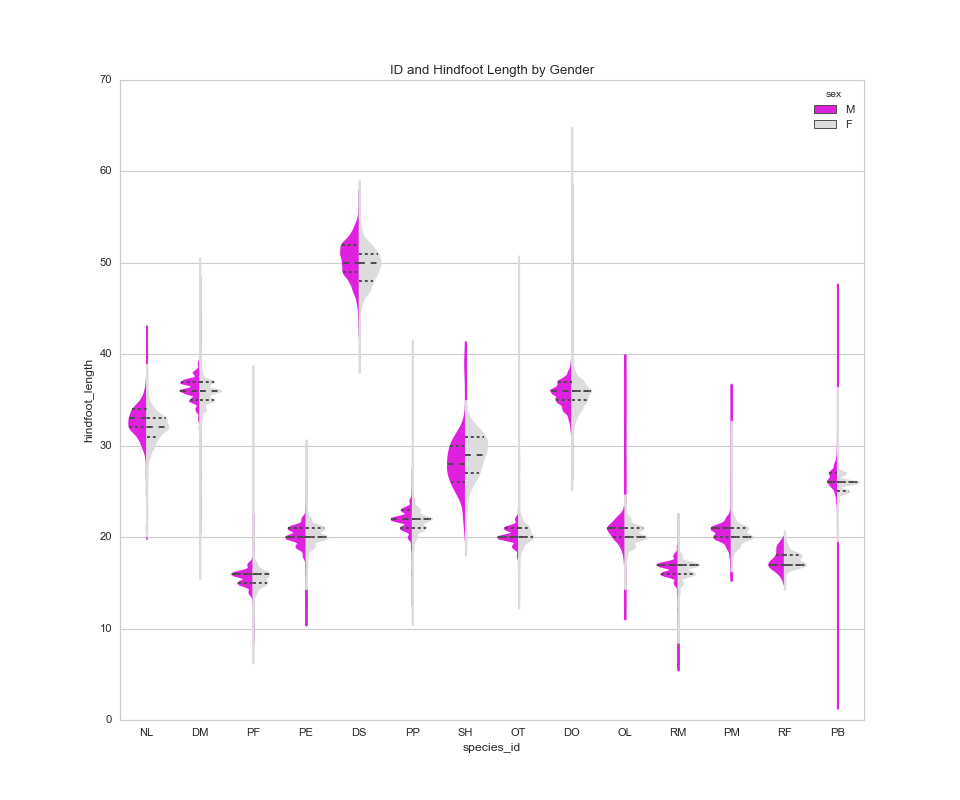

In [17]:
plt.figure(figsize = (12,10))
sns.violinplot('species_id', 'hindfoot_length', hue = 'sex',
              data = df,   split = True, inner = 'quartile',
              palette = ['fuchsia', 'gainsboro'])
plt.title("ID and Hindfoot Length by Gender")